In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import pandas as pd

pd.set_option("display.max_columns", None)


import matplotlib
matplotlib.use('Agg')  # Use Agg backend if full matplotlib is imported

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is imported

get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

RANDOM_SEED = 42

# Set default style for seaborn
sns.set(style='whitegrid')


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Data Loading
data_path = '/content/drive/MyDrive/india_ckd.csv'
df = pd.read_csv(data_path, delimiter=',', encoding='ascii')

print('Dataset loaded successfully.')
print('Shape:', df.shape)

Dataset loaded successfully.
Shape: (1100, 26)


In [8]:
# #Use this if mounting local csv (run in jupyter notebook)
# import os
# data_path = 'CKD_India.csv'
# # Get the directory of the current notebook
# notebook_dir = os.path.dirname(os.path.abspath('__file__'))
# file_path = os.path.join(notebook_dir, data_path)
# df = pd.read_csv(file_path, delimiter=',', encoding='ascii')

# print('Dataset loaded successfully.')
# print('Shape:', df.shape)

In [9]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,102,17.0,60.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,92.0,32.0,2.1,141.0,4.2,13.9,52,7000,NaN,no,no,no,good,no,no,ckd
1,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,99.0,19.0,0.5,147.0,3.5,13.6,44,7300,6.4,no,no,no,good,no,no,notckd
2,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,111.0,34.0,1.1,145.0,4.0,14.3,41,7200,5.0,no,no,no,good,no,no,notckd
3,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,89.0,118.0,6.1,127.0,4.4,6.0,17,6500,NaN,yes,yes,no,good,yes,yes,ckd
4,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,163.0,92.0,3.3,141.0,4.0,9.8,28,14600,3.2,yes,yes,no,good,no,no,ckd


In [10]:
new_df = df.copy()

## **2. Outlier Detection And Removal**

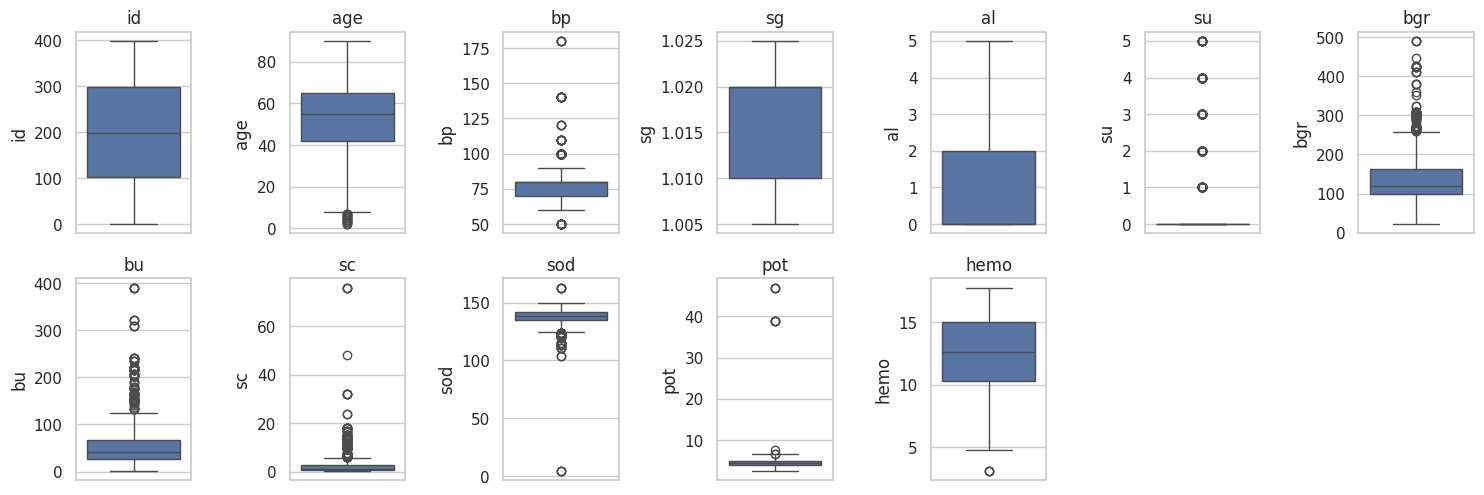

In [11]:
# Create boxplots for numerical columns to visualize outliers
numerical_cols = new_df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 7, i + 1)  # Adjust subplot grid based on number of numerical columns
    sns.boxplot(y=new_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Apply outlier removal to numerical columns
numerical_cols = new_df.select_dtypes(include=np.number).columns
new_df_cleaned = new_df.copy() # Create a copy to avoid modifying the original new_df

for col in numerical_cols:
    initial_shape = new_df_cleaned.shape[0]
    new_df_cleaned = remove_outliers_iqr(new_df_cleaned, col)
    rows_removed = initial_shape - new_df_cleaned.shape[0]
    print(f"Removed {rows_removed} outliers from column '{col}'.")

print("\nOutliers removed from numerical columns.")
print("Shape before outlier removal:", new_df.shape)
print("Shape after outlier removal:", new_df_cleaned.shape)

new_df = new_df_cleaned # Update new_df to the cleaned version

Removed 0 outliers from column 'id'.
Removed 48 outliers from column 'age'.
Removed 119 outliers from column 'bp'.
Removed 98 outliers from column 'sg'.
Removed 2 outliers from column 'al'.
Removed 131 outliers from column 'su'.
Removed 108 outliers from column 'bgr'.
Removed 60 outliers from column 'bu'.
Removed 65 outliers from column 'sc'.
Removed 46 outliers from column 'sod'.
Removed 0 outliers from column 'pot'.
Removed 35 outliers from column 'hemo'.

Outliers removed from numerical columns.
Shape before outlier removal: (1100, 26)
Shape after outlier removal: (388, 26)


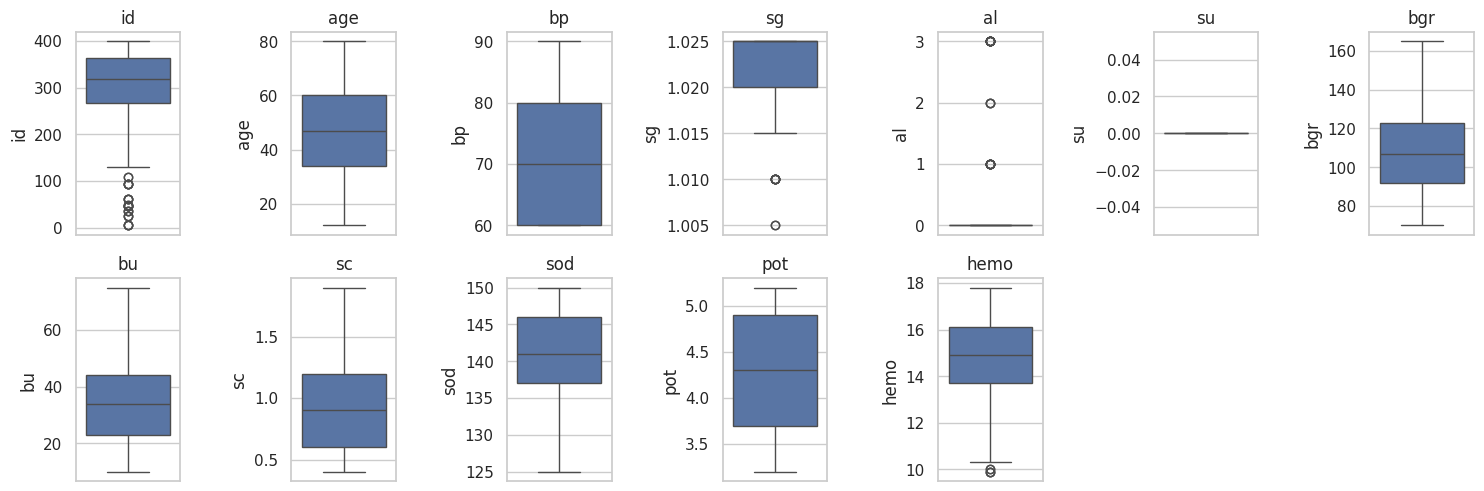

In [13]:
# Create boxplots for numerical columns to visualize outliers
numerical_cols = new_df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 7, i + 1)  # Adjust subplot grid based on number of numerical columns
    sns.boxplot(y=new_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()